<a href="https://colab.research.google.com/github/micaelakorol21/water_quality/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Clasificación de Agua Potable</h1>
<h2>🚰El objetivo de este proyecto es predecir si una muestra de agua es potable basándonos en características físico-químicas y ambientales.</h2>

In [122]:
df = pd.read_csv('https://media.githubusercontent.com/media/micaelakorol21/dataset_water_quality/refs/heads/main/Water_quality.csv')

<p style="font-size:20px;">🔍Exploración de los datos:</p>

In [124]:
df.shape
# El dataset poseé: 24 columnas y 698.575 filas.

(698575, 24)

In [125]:
# Tipos de datos de cada columna:
df.dtypes

Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object

In [135]:
# Columnas que tienen datos faltantes
df.isna().sum()

Index                         0
pH                        13438
Iron                       4684
Nitrate                   12430
Chloride                  20467
Lead                       3107
Zinc                      18498
Color                       660
Turbidity                  5798
Fluoride                  21996
Copper                    23291
Odor                      20782
Sulfate                   22746
Conductivity              19210
Chlorine                   6709
Manganese                 12832
Total Dissolved Solids      205
Source                    10324
Water Temperature         19779
Air Temperature            3555
Month                     11292
Day                       11628
Time of Day               13565
Target                        0
dtype: int64

In [137]:
max_missing = df.isna().sum().max()  # Calculo el maximo valor faltante
print(f"El valor maximo de faltantes es de {max_missing}")

El valor maximo de faltantes es de 23291


<b style='font-size:22px'>Renombramos las columnas</b>

In [140]:
df = df.rename(columns={
    'Index': 'Índice',
    'pH': 'pH',
    'Iron': 'Plata',
    'Nitrate': 'Nitrato',
    'Chloride': 'Cloruros',
    'Lead': 'Plomo',
    'Zinc': 'Zinc',
    'Color': 'Color',
    'Turbidity': 'Turbidez',
    'Fluoride': 'Fluoruro',
    'Copper': 'Cobre',
    'Odor': 'Olor',
    'Sulfate': 'Sulfatos',
    'Conductivity': 'Conductividad',
    'Chlorine': 'Cloro residual libre',
    'Manganese': 'Manganeso',
    'Total Dissolved Solids': 'Sólidos disueltos totales',
    'Source': 'Fuente',
    'Water Temperature': 'Temperatura del agua',
    'Air Temperature': 'Temperatura del aire',
    'Month': 'Mes',
    'Day': 'Día',
    'Time of Day': 'Hora del día',
    'Target': 'Objetivo'
})

<b style="font-size:16px">El conjunto de datos incluye 24 columnas, de las cuales 23 son variables predictoras y 1 es la variable objetivo que indica si el agua <b style='color:red'> es potable (1) o no (0)  </b> .</b>

In [143]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')

<b style="font-size:22px;"> Análisis de la variable objetivo: Objetivo</b>

In [146]:
# Conteo de clases
df['Objetivo'].value_counts()

Objetivo
0    457841
1    240734
Name: count, dtype: int64

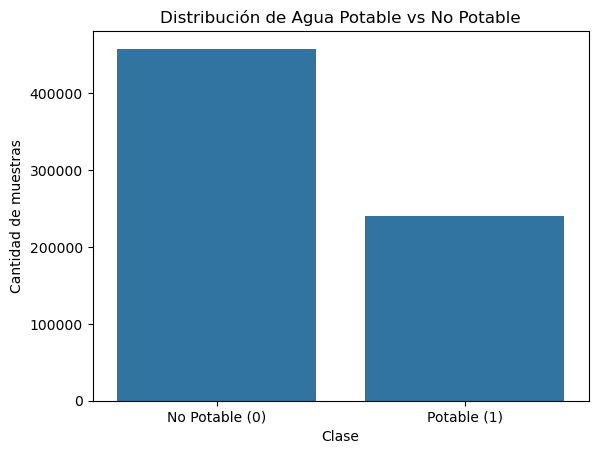

In [148]:
sns.countplot(data=df, x='Objetivo')
plt.title('Distribución de Agua Potable vs No Potable')
plt.xticks([0, 1], ['No Potable (0)', 'Potable (1)'])
plt.ylabel('Cantidad de muestras')
plt.xlabel('Clase')
plt.show()

<b style='font-size:16px'>El dataset está desbalanceado: hay más muestras de agua no potable (457841) que de agua potable (240734).</b>

<b style="font-size:22px">Limpieza de los datos de la columna pH </b>

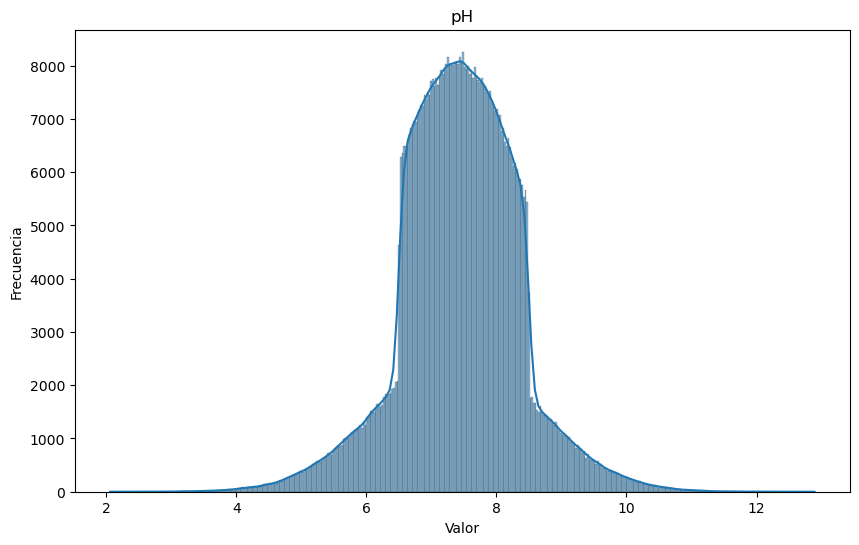

In [152]:
# Observamos la distribuición de la columna pH:
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [153]:
df['pH'].describe()

count    685137.000000
mean          7.442448
std           0.911493
min           2.058008
25%           6.880107
50%           7.447080
75%           8.023730
max          12.891960
Name: pH, dtype: float64

In [154]:
#Eliminar outliers de la fila pH

col = 'pH'  # ejemplo
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
# eliminando las filas que contienen valores en la columna pH que están fuera del rango definido
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
df['pH'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['pH'].describe()

count    667067.000000
mean          7.449839
std           0.803099
min           5.164678
25%           6.899036
50%           7.450028
75%           8.010550
max           9.739132
Name: pH, dtype: float64

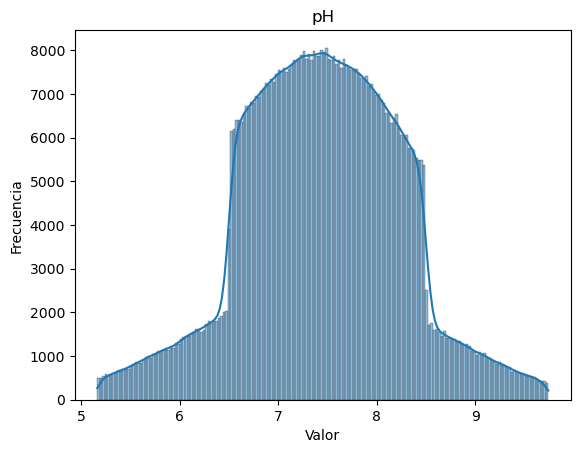

In [155]:
plt.figure()
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show() # ¿no es mejor usar z score?

<p>Análisis de pH 📝 Después de eliminar los valores nulos y los outliers en la columna pH, se observaron variaciones significativas en las estadísticas descriptivas. Se eliminaron aproximadamente 29,870 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, hubo un ligero aumento, pasando de 7.45 a 7.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por debajo del promedio general. La desviación estándar también se redujo notablemente de 0.85 a 0.73, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo cambió de 2.06 a 5.36 y el máximo de 12.89 a 9.57, lo que confirma que se eliminaron los valores más extremos en ambos extremos del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable</p>

In [160]:
df.isna().sum()

Índice                           0
pH                               0
Plata                         4463
Nitrato                      11923
Cloruros                     19596
Plomo                         2973
Zinc                         17623
Color                          627
Turbidez                      5573
Fluoruro                     21014
Cobre                        22180
Olor                         19865
Sulfatos                     21776
Conductividad                18344
Cloro residual libre          6398
Manganeso                    12222
Sólidos disueltos totales      194
Fuente                        9846
Temperatura del agua         18890
Temperatura del aire          3413
Mes                          10792
Día                          11096
Hora del día                 12955
Objetivo                         0
dtype: int64

<b style="font-size:22px">Limpieza de los datos de la columna Plata </b>

In [164]:
df['Plata'].describe()

count    6.626040e+05
mean     1.320244e-01
std      4.859343e-01
min      8.010000e-45
25%      1.010000e-05
50%      2.325443e-03
75%      5.635290e-02
max      1.574860e+01
Name: Plata, dtype: float64

In [175]:
col_p = 'Plata'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    3.950740e+05
mean     1.038978e-03
std      1.989143e-03
min      8.010000e-45
25%      1.702500e-07
50%      4.070000e-05
75%      9.691630e-04
max      9.161185e-03
Name: Plata, dtype: float64


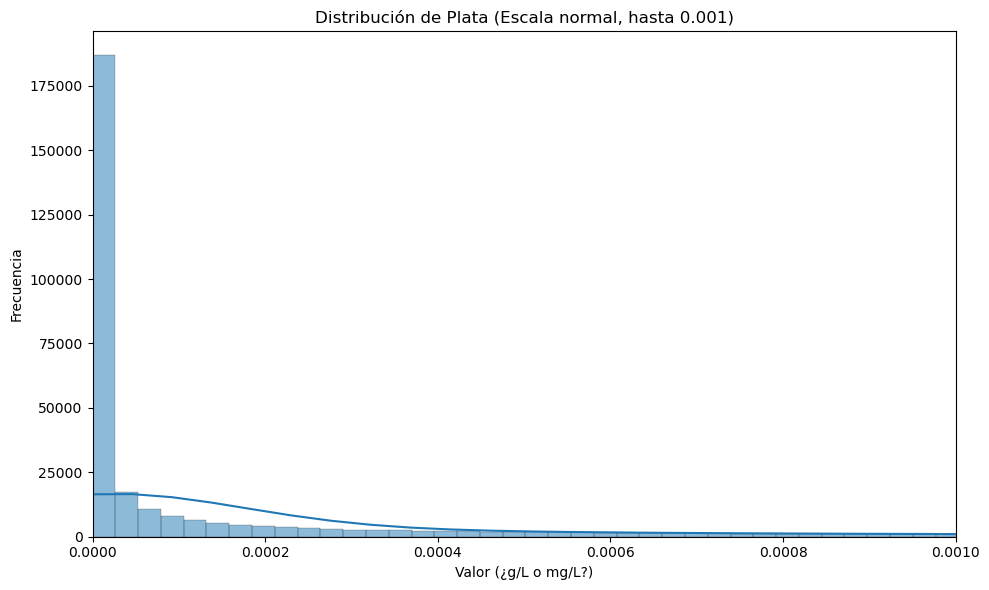

In [177]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normal acotado hasta 0.001
sns.histplot(df['Plata'], kde=True, ax=ax)

# Acotar eje X para observar mejor valores pequeños
ax.set_xlim(0, 0.001)

# Agregar títulos y etiquetas
ax.set_title('Distribución de Plata (Escala normal, hasta 0.001)')
ax.set_xlabel('Valor (¿g/L o mg/L?)')  # Cambiar al confirmar la unidad
ax.set_ylabel('Frecuencia')

# Ajustar presentación
plt.tight_layout()
plt.show()

<b style="font-size:22px">Limpieza de los datos de la columna Plomo </b>

In [198]:
#df['Plomo'].head(30)
#ver si tiene datos nulos.........................

<b style="font-size:22px">Limpieza de los datos de la columna Nitrato </b>

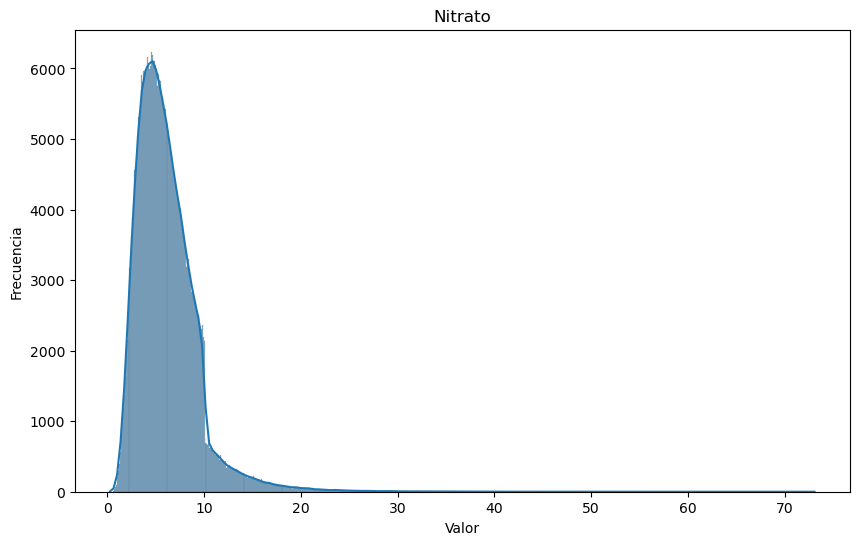

In [205]:
# Observamos la distribuición de la columna Nitrato:
plt.figure(figsize=(10, 6))
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [207]:
df['Nitrato'].describe()

count    387913.000000
mean          6.129718
std           3.209822
min           0.286173
25%           3.960034
50%           5.588314
75%           7.631421
max          73.072931
Name: Nitrato, dtype: float64

In [209]:
#Eliminar outliers de la fila Nitrato

col2 = 'Nitrato'  # ejemplo
Q1 = df[col2].quantile(0.25)
Q3 = df[col2].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col2] >= Q1 - 1.5 * IQR) & (df[col2] <= Q3 + 1.5 * IQR)]
df['Nitrato'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Nitrato'].describe()

count    375682.000000
mean          5.764054
std           2.383906
min           0.286173
25%           3.909285
50%           5.478570
75%           7.401614
max          13.138288
Name: Nitrato, dtype: float64

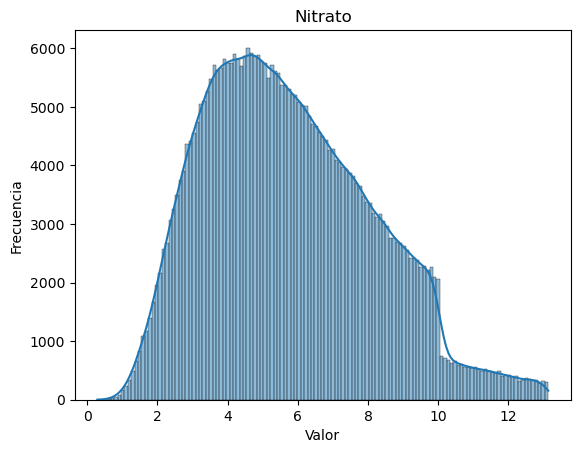

In [211]:
plt.figure()
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Nitrato 📝 Después de eliminar los valores nulos y los outliers, se eliminaron aproximadamente 17,370 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 6.13 a 5.76, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 3.21 a 2.28, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 73.07 a 13.14, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 45 mg/l, hay que evaluar que unidad maneja el dataset para coincidir con el promedio aprox.</p>

<b style="font-size:22px">Limpieza de los datos de la columna Cloruros</b>

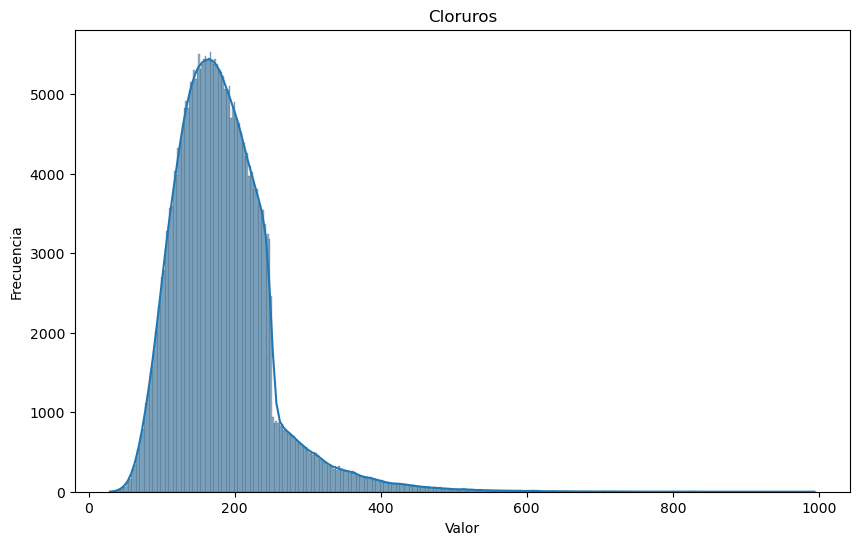

In [220]:
# Observamos la distribuición de la columna Cloruros:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [221]:
df['Cloruros'].describe()

count    364518.000000
mean        182.768525
std          66.686744
min          29.413497
25%         137.887786
50%         175.293508
75%         216.394348
max         993.933248
Name: Cloruros, dtype: float64

In [222]:
#Eliminar outliers de la fila Cloruros

col3 = 'Cloruros'  # ejemplo
Q1 = df[col3].quantile(0.25)
Q3 = df[col3].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col3] >= Q1 - 1.5 * IQR) & (df[col3] <= Q3 + 1.5 * IQR)]
df['Cloruros'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Cloruros'].describe()

count    353321.000000
mean        175.630319
std          52.483088
min          29.413497
25%         136.654648
50%         172.995164
75%         212.118879
max         334.147754
Name: Cloruros, dtype: float64

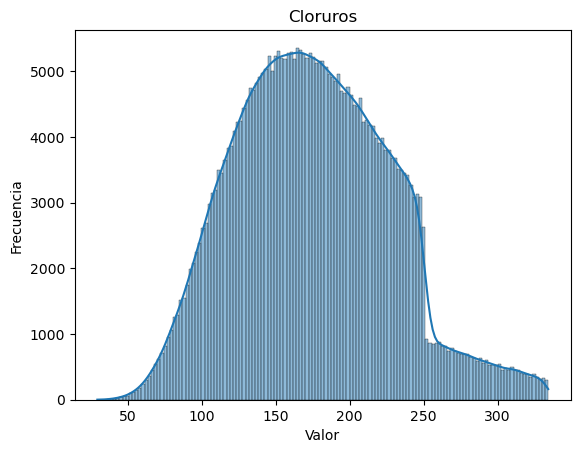

In [226]:
plt.figure()
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Cloruros 📝 Después de eliminar los valores nulos y los outliers, se eliminaron 15,717 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 182.68 a 175.57, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 66.58 a 52.55, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 1321 a 334, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 200 mg/l, se considera que utiliza esta unidad ya que tiene coherencia.</p>

<b style="font-size:22px">Limpieza de los datos de la columna Plomo, Zinc, Manganeso APLICARLES LOGARITMOS</b>

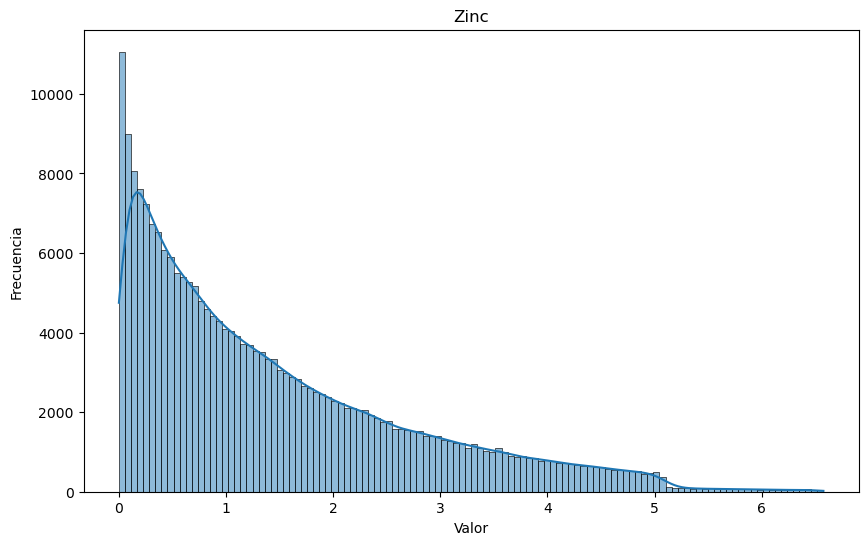

In [355]:
# Observamos la distribuición de la columna Zinc:
plt.figure(figsize=(10, 6))
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [356]:
df['Zinc'].describe()

count    228502.000000
mean          1.436926
std           1.285052
min           0.000001
25%           0.405433
50%           1.056581
75%           2.144436
max           6.576596
Name: Zinc, dtype: float64

In [359]:
#Eliminar outliers de la fila Zinc

col5 = 'Zinc'  # ejemplo
Q1 = df[col5].quantile(0.25)
Q3 = df[col5].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col5] >= Q1 - 2.5 * IQR) & (df[col5] <= Q3 + 2.5 * IQR)]
df['Zinc'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Zinc'].describe()

count    228438.000000
mean          1.435498
std           1.282395
min           0.000001
25%           0.405284
50%           1.056089
75%           2.143085
max           6.486992
Name: Zinc, dtype: float64

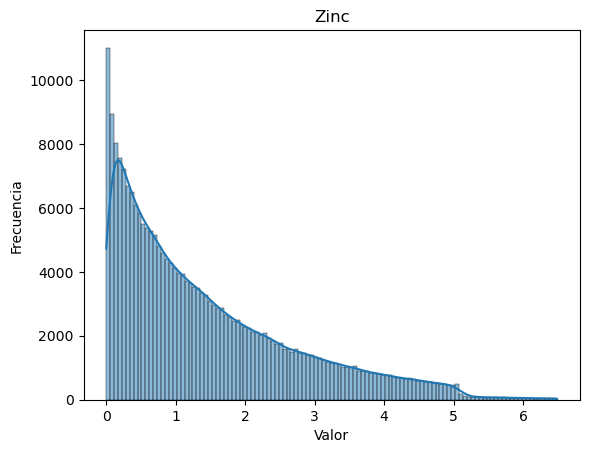

In [361]:
#Volvemos a graficar
plt.figure()
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Zinc 📝 Después de eliminar los valores nulos y los outliers, se eliminaron solo 4,594 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 1.53 a 1.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 1.50 a 1.42, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 28.36 a 6.72, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 5 mg/l, se considera que utiliza esta unidad ya que tiene coherencia.</p>

<b> Limpieza de los datos de la columna Plomo, Manganeso : </b>

In [449]:
df['Plomo'].describe()

count    20.000000
mean     -1.500238
std       0.981930
min      -3.164561
25%      -2.261609
50%      -1.363259
75%      -0.831965
max       0.066565
Name: Plomo, dtype: float64

In [468]:
df['Manganeso'].describe()

count    2.000000e+01
mean     3.312832e-01
std      7.984338e-01
min      1.170000e-14
25%      1.937251e-03
50%      1.327553e-02
75%      1.032429e-01
max      3.319389e+00
Name: Manganeso, dtype: float64

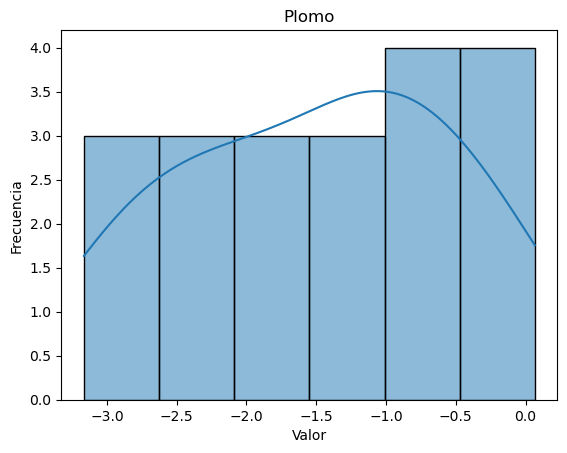

In [457]:
plt.figure()
sns.histplot(df['Plomo'], kde=True)
plt.title('Plomo')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<h2 style='color:red'> Temperatura del agua / aire ------- Pendiente (Micaela) </h2>
# Aplicarle IQL y graficar nuevamente.

<h2 style='color:red'> Columna Manganeso pendiente (Micaela) </h2>
##################### df['Manganeso'].describe() - pendiente

In [426]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')

<b style="font-size:22px">Análisis de columnas: Turbidez, Fluoruro, Cobre, Olor, Sulfatos</b>

In [297]:
columnas = ['Turbidez','Fluoruro', 'Cobre','Olor','Sulfatos']

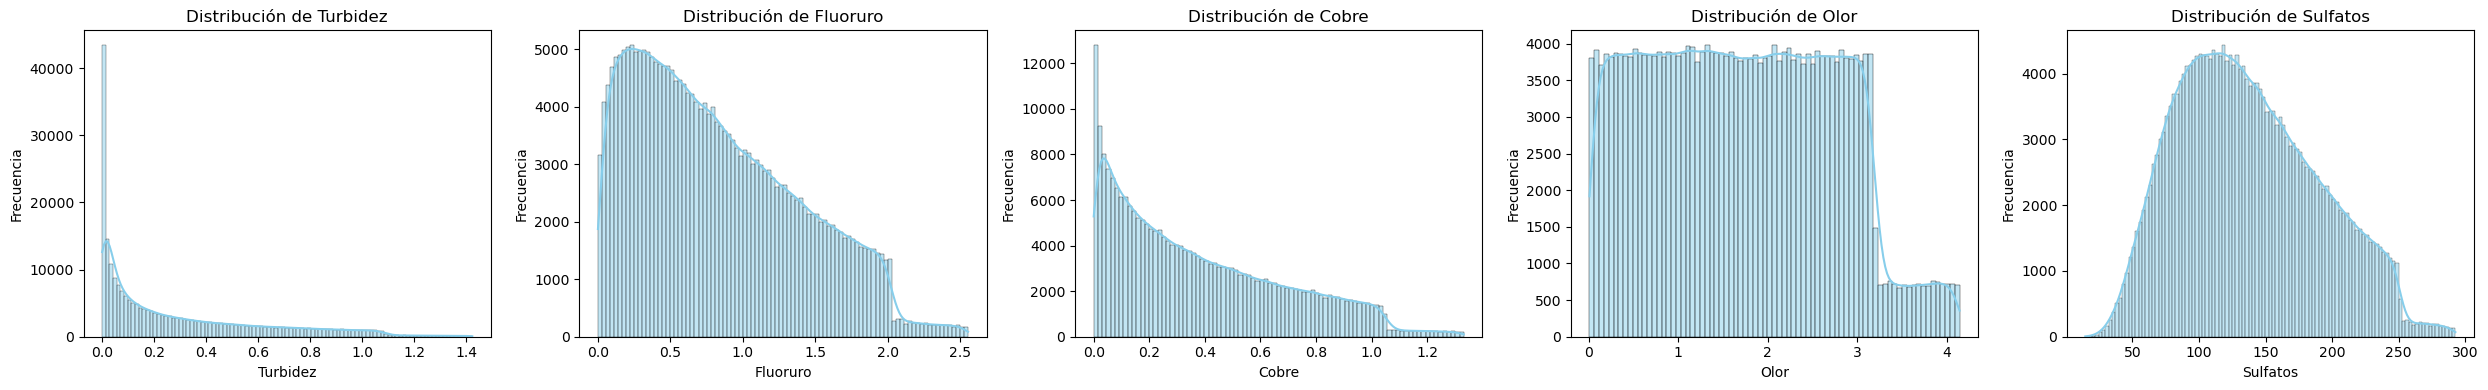

In [299]:
#Gráfico:
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [311]:
# Aplicamos IQR
cols = ['Turbidez','Fluoruro', 'Cobre','Olor','Sulfatos']  # Selecciona las columnas a analizar
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

In [313]:
df.isna().sum()

Índice                          0
pH                              0
Plata                           0
Nitrato                         0
Cloruros                        0
Plomo                        1068
Zinc                         6166
Color                         215
Turbidez                        0
Fluoruro                        0
Cobre                           0
Olor                            0
Sulfatos                        0
Conductividad                   0
Cloro residual libre            0
Manganeso                    4415
Sólidos disueltos totales       0
Fuente                       3469
Temperatura del agua         6617
Temperatura del aire         1192
Mes                          3798
Día                          4003
Hora del día                 4646
Objetivo                        0
dtype: int64

<h1>CONCLUSIÓN:</h1>

<b style="font-size:22px">Análisis de columnas: Conductividad, Cloro residual libre, Sólidos disueltos totales</b>

In [316]:
columnas2 = ['Conductividad','Cloro residual libre','Sólidos disueltos totales']

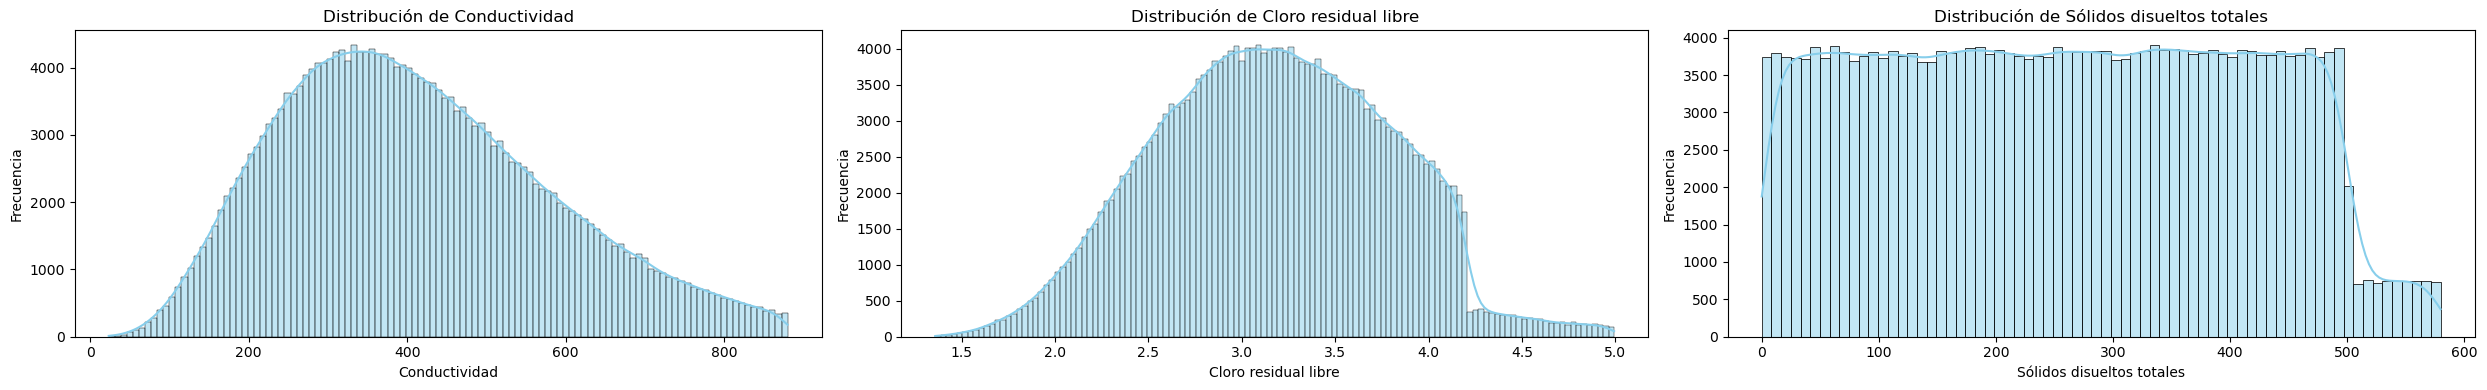

In [318]:
#Gráficamos
fig, axes = plt.subplots(1, len(columnas2), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas2):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [330]:
#IQR
cols2 = ['Conductividad', 'Cloro residual libre', 'Sólidos disueltos totales']  # Selecciona las columnas a analizar
for col in cols2:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

<h1>CONCLUSIÓN:</h1>

<h2 style='color:red'> Temperatura del agua / aire ------- Pendiente (Micaela) </h2>

<h1>Sección categorica:</h1>

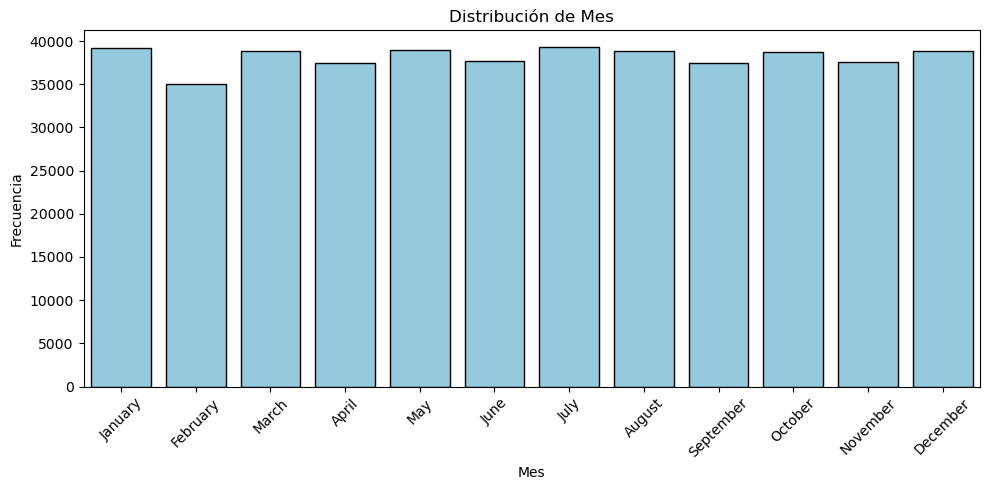

In [203]:
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Mes', order=orden_meses, color='skyblue', edgecolor='black')

plt.title('Distribución de Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor lectura
plt.tight_layout()
plt.show()

In [ ]:
# Luego de detectar outliers y demás: A) Encoding de Var. categóricas. B) Binning ; C) Estandarización

# Var categoricas: Month , Color.